# Exploratory data analysis

In [58]:
# Load packages
import pandas as pd
import altair as alt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 1. Description of  dataset

The dataset we chose is Bank Marketing data of a Portugese banking instituion collected from [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The dataset was donated in 2012-02-14. It was sourced from S. Moro, P. Cortez and P. Rita in a research paper "A Data-Driven Approach to Predict the Success of Bank Telemarketing". Detail of the source is provided in the reference session.

The dataset has 4521 observations, 16 features and a response variable `y` which indicates if the client subscribed a term deposit or not (binary: 'yes','no'). The classes are imbalance: there are 4000 no and 521 yes. There are 0 observations with missing values in the data set. 

## 2. Load the dataset

The dataset was download from the `get_data.py` script in our repository.

### 2.1 load dataset

In [3]:
bank = pd.read_csv("../data/bank.csv", sep = ";")

In [26]:
bank.shape

(4521, 17)

In [29]:
bank.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

### 2.2 Split data set into train and test

We split the data as 80% training dataset and 20% test data. The classes are imbalance, but training and test set has the similar proportion of each class. We will use `bank_train` dataset to do the exploring. 

In [9]:
X = bank.drop('y', axis = 1)
y = bank.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=402)

In [34]:
bank_train = X_train.join(y_train)

In [41]:
y_train.value_counts()

no     3199
yes     417
Name: y, dtype: int64

In [42]:
y_test.value_counts()

no     801
yes    104
Name: y, dtype: int64

## 3. Explore the dataset

### 3.1 Overview

In [37]:
bank_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3914,30,technician,married,tertiary,no,569,no,no,cellular,27,aug,976,12,-1,0,unknown,yes
2243,32,services,married,secondary,no,401,yes,no,unknown,15,may,294,2,-1,0,unknown,no
1208,28,management,married,tertiary,no,3694,no,yes,cellular,8,jul,70,2,-1,0,unknown,no
3525,31,admin.,single,secondary,no,68,yes,no,cellular,16,apr,570,2,-1,0,unknown,no
4449,31,self-employed,single,secondary,no,360,yes,no,unknown,26,may,592,4,-1,0,unknown,no


In [38]:
bank_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3616 entries, 3914 to 389
Data columns (total 17 columns):
age          3616 non-null int64
job          3616 non-null object
marital      3616 non-null object
education    3616 non-null object
default      3616 non-null object
balance      3616 non-null int64
housing      3616 non-null object
loan         3616 non-null object
contact      3616 non-null object
day          3616 non-null int64
month        3616 non-null object
duration     3616 non-null int64
campaign     3616 non-null int64
pdays        3616 non-null int64
previous     3616 non-null int64
poutcome     3616 non-null object
y            3616 non-null object
dtypes: int64(7), object(10)
memory usage: 668.5+ KB


### 3.2 Numeric data

In [43]:
bank_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,41.010509,1382.212113,15.952157,263.445796,2.818031,40.860066,0.540376
std,10.589820,2741.309725,8.219713,258.829728,3.190072,102.352613,1.630459
min,19.000000,-1746.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,33.000000,63.750000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,432.500000,16.000000,187.000000,2.000000,-1.000000,0.000000
75%,48.000000,1464.250000,21.000000,331.000000,3.000000,-1.000000,0.000000
max,87.000000,27733.000000,31.000000,3025.000000,50.000000,871.000000,23.000000


### 3.3 Categorical data

In [57]:
#job
print("There are {} job types:{} \n".format(bank_train.job.nunique(), 
                                                      bank_train.job.unique()))
#marital
print("There are {} marital status:{} \n".format(bank_train.marital.nunique(), 
                                                           bank_train.marital.unique()))
#education
print("There are {} education levels:{} \n".format(bank_train.education.nunique(), 
                                                           bank_train.education.unique()))
#default
print("Default variable (has credit in default) contains: {} \n".format(bank_train.default.unique()))

# housing
print("Housing variable (has housing loan) contains: {} \n".format(bank_train.housing.unique()))

#loan 
print("Loan variable (has personal loan) contains: {} \n".format(bank_train.loan.unique()))

#contact
print("Contact communication types: {} \n".format(bank_train.contact.unique()))

#month
print("{} months: {} \n".format(bank_train.month.nunique(), bank_train.month.unique()))

#poutcome
print("Outcome of the previous marketing campaign: {}".format(bank_train.poutcome.unique()))


There are 12 job types:['technician' 'services' 'management' 'admin.' 'self-employed' 'unemployed'
 'blue-collar' 'retired' 'housemaid' 'student' 'entrepreneur' 'unknown'] 

There are 3 marital status:['married' 'single' 'divorced'] 

There are 4 education levels:['tertiary' 'secondary' 'primary' 'unknown'] 

Default variable (has credit in default) contains: ['no' 'yes'] 

Housing variable (has housing loan) contains: ['no' 'yes'] 

Loan variable (has personal loan) contains: ['no' 'yes'] 

Contact communication types: ['cellular' 'unknown' 'telephone'] 

12 months: ['aug' 'may' 'jul' 'apr' 'nov' 'jun' 'feb' 'oct' 'jan' 'mar' 'sep' 'dec'] 

Outcome of the previous marketing campaign: ['unknown' 'success' 'failure' 'other']


## 4. Research questions

Given a client's information, predict whether a client will subscribe for a term deposit or not?

## 5. Data Analysis & Visualizations



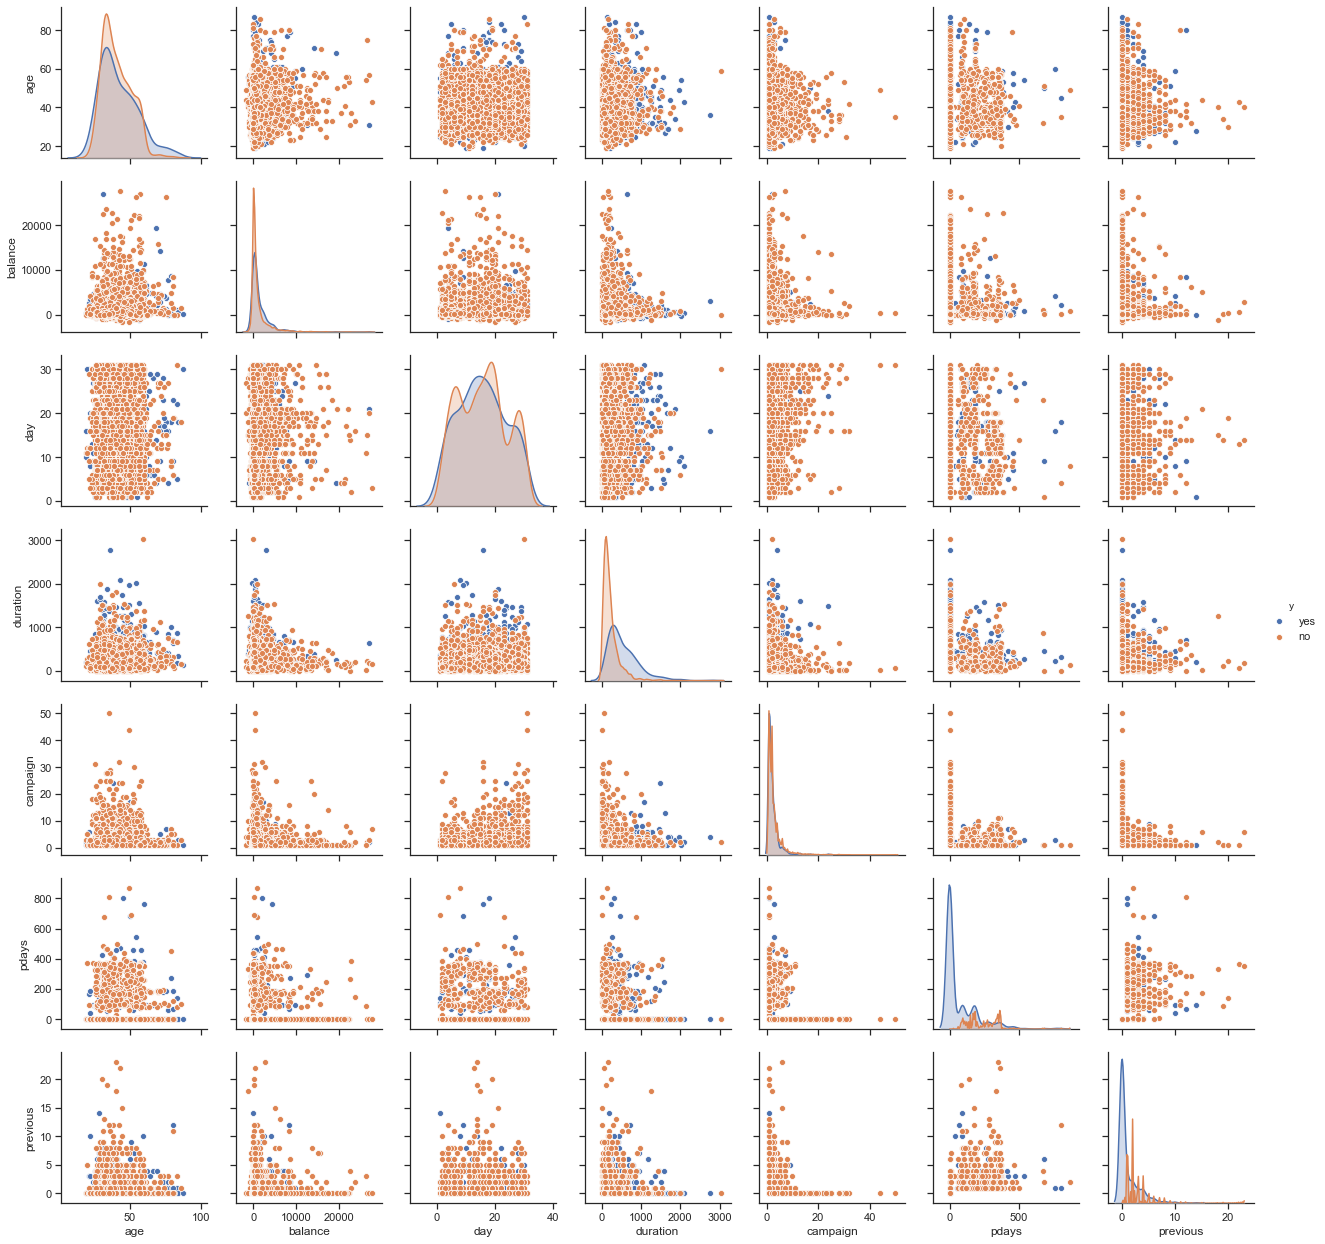

In [59]:
sns.set(style="ticks")
sns.pairplot(bank_train,hue='y')

## References

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

UCI Machine Learning Repository. University of California, Irvine, School of Information; Computer Sciences.https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
